<a href="https://colab.research.google.com/github/edsondamasceno/Data-Analysis/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supermarket Sales Dataset

Este conjunto de dados captura registros detalhados de transações de uma rede de supermercados em Mianmar, abrangendo três cidades: Yangon, Naypyitaw e Mandalay. Ele fornece uma visão abrangente das atividades de vendas, dados demográficos dos clientes e métodos de pagamento de janeiro a março de 2019

Link: https://www.kaggle.com/code/sudesoylemez/data-analyst-on-sales-data/input

Este conjunto de dados é ideal para análises de vendas, estudos de comportamento do consumidor e modelagem preditiva. Pode ser utilizado em tarefas como segmentação de clientes, análise de tendências e previsão.

In [224]:
!pip install dcalendario

In [225]:
import pandas as pd
import numpy as np
import duckdb

import seaborn as sns
import matplotlib.pyplot as plt

import dcalendario

In [226]:
pd.set_option('display.max_colwidth', None)

## Lendo a Base de Dados

In [227]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Dataset/SuperMarket_Analysis.csv')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

##Análise exploratória de dados

É interessante notar que os dados de vendas de um supermercado podem revelar informações valiosas. Aqui, exploramos as relações entre características numéricas e a distribuição de variáveis ​​categóricas.

In [229]:
df_copy = df.copy()
df_copy.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


/tmp/ipython-input-2230629145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='Payment', palette='pastel')


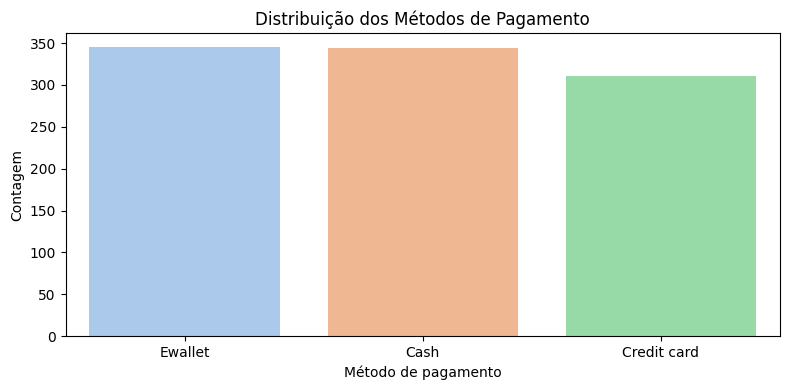

In [230]:
#Visualizando um gráfico de contagem para a coluna Pagamento.
plt.figure(figsize=(8, 4))
sns.countplot(data=df_copy, x='Payment', palette='pastel')
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

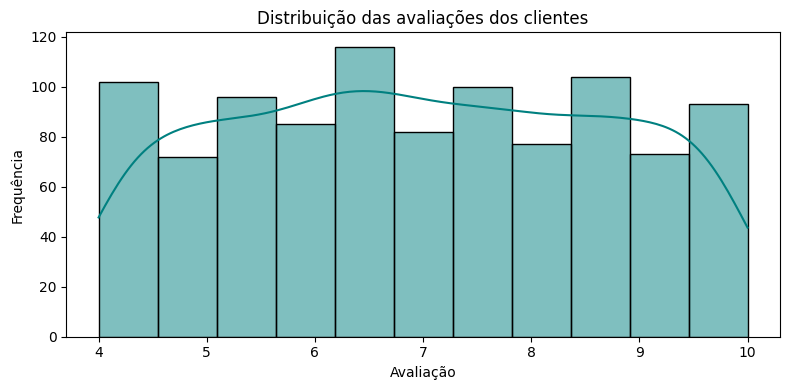

In [231]:
# Visualizando o histograma para a coluna de classificação.
plt.figure(figsize=(8, 4))
sns.histplot(df_copy['Rating'], kde=True, color='teal')
plt.title('Distribuição das avaliações dos clientes')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

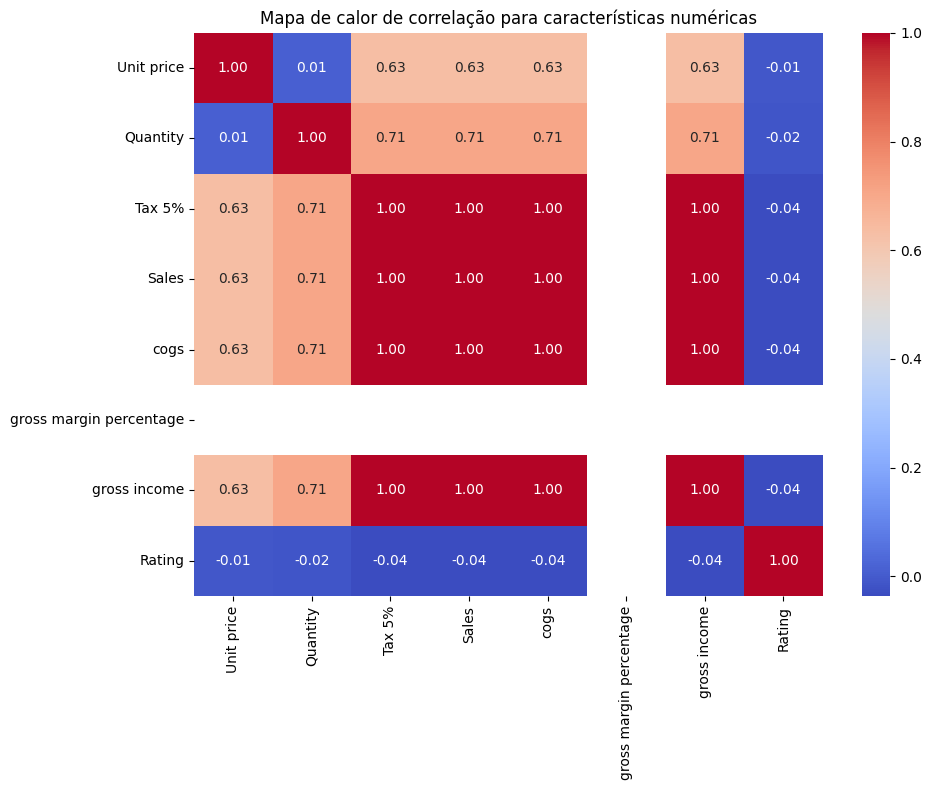

In [232]:
# Visualizando um mapa de calor de correlação
numeric_df = df_copy.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Mapa de calor de correlação para características numéricas')
    plt.tight_layout()
    plt.show()
else:
    print('Não há colunas numéricas suficientes para um mapa de calor de correlação')

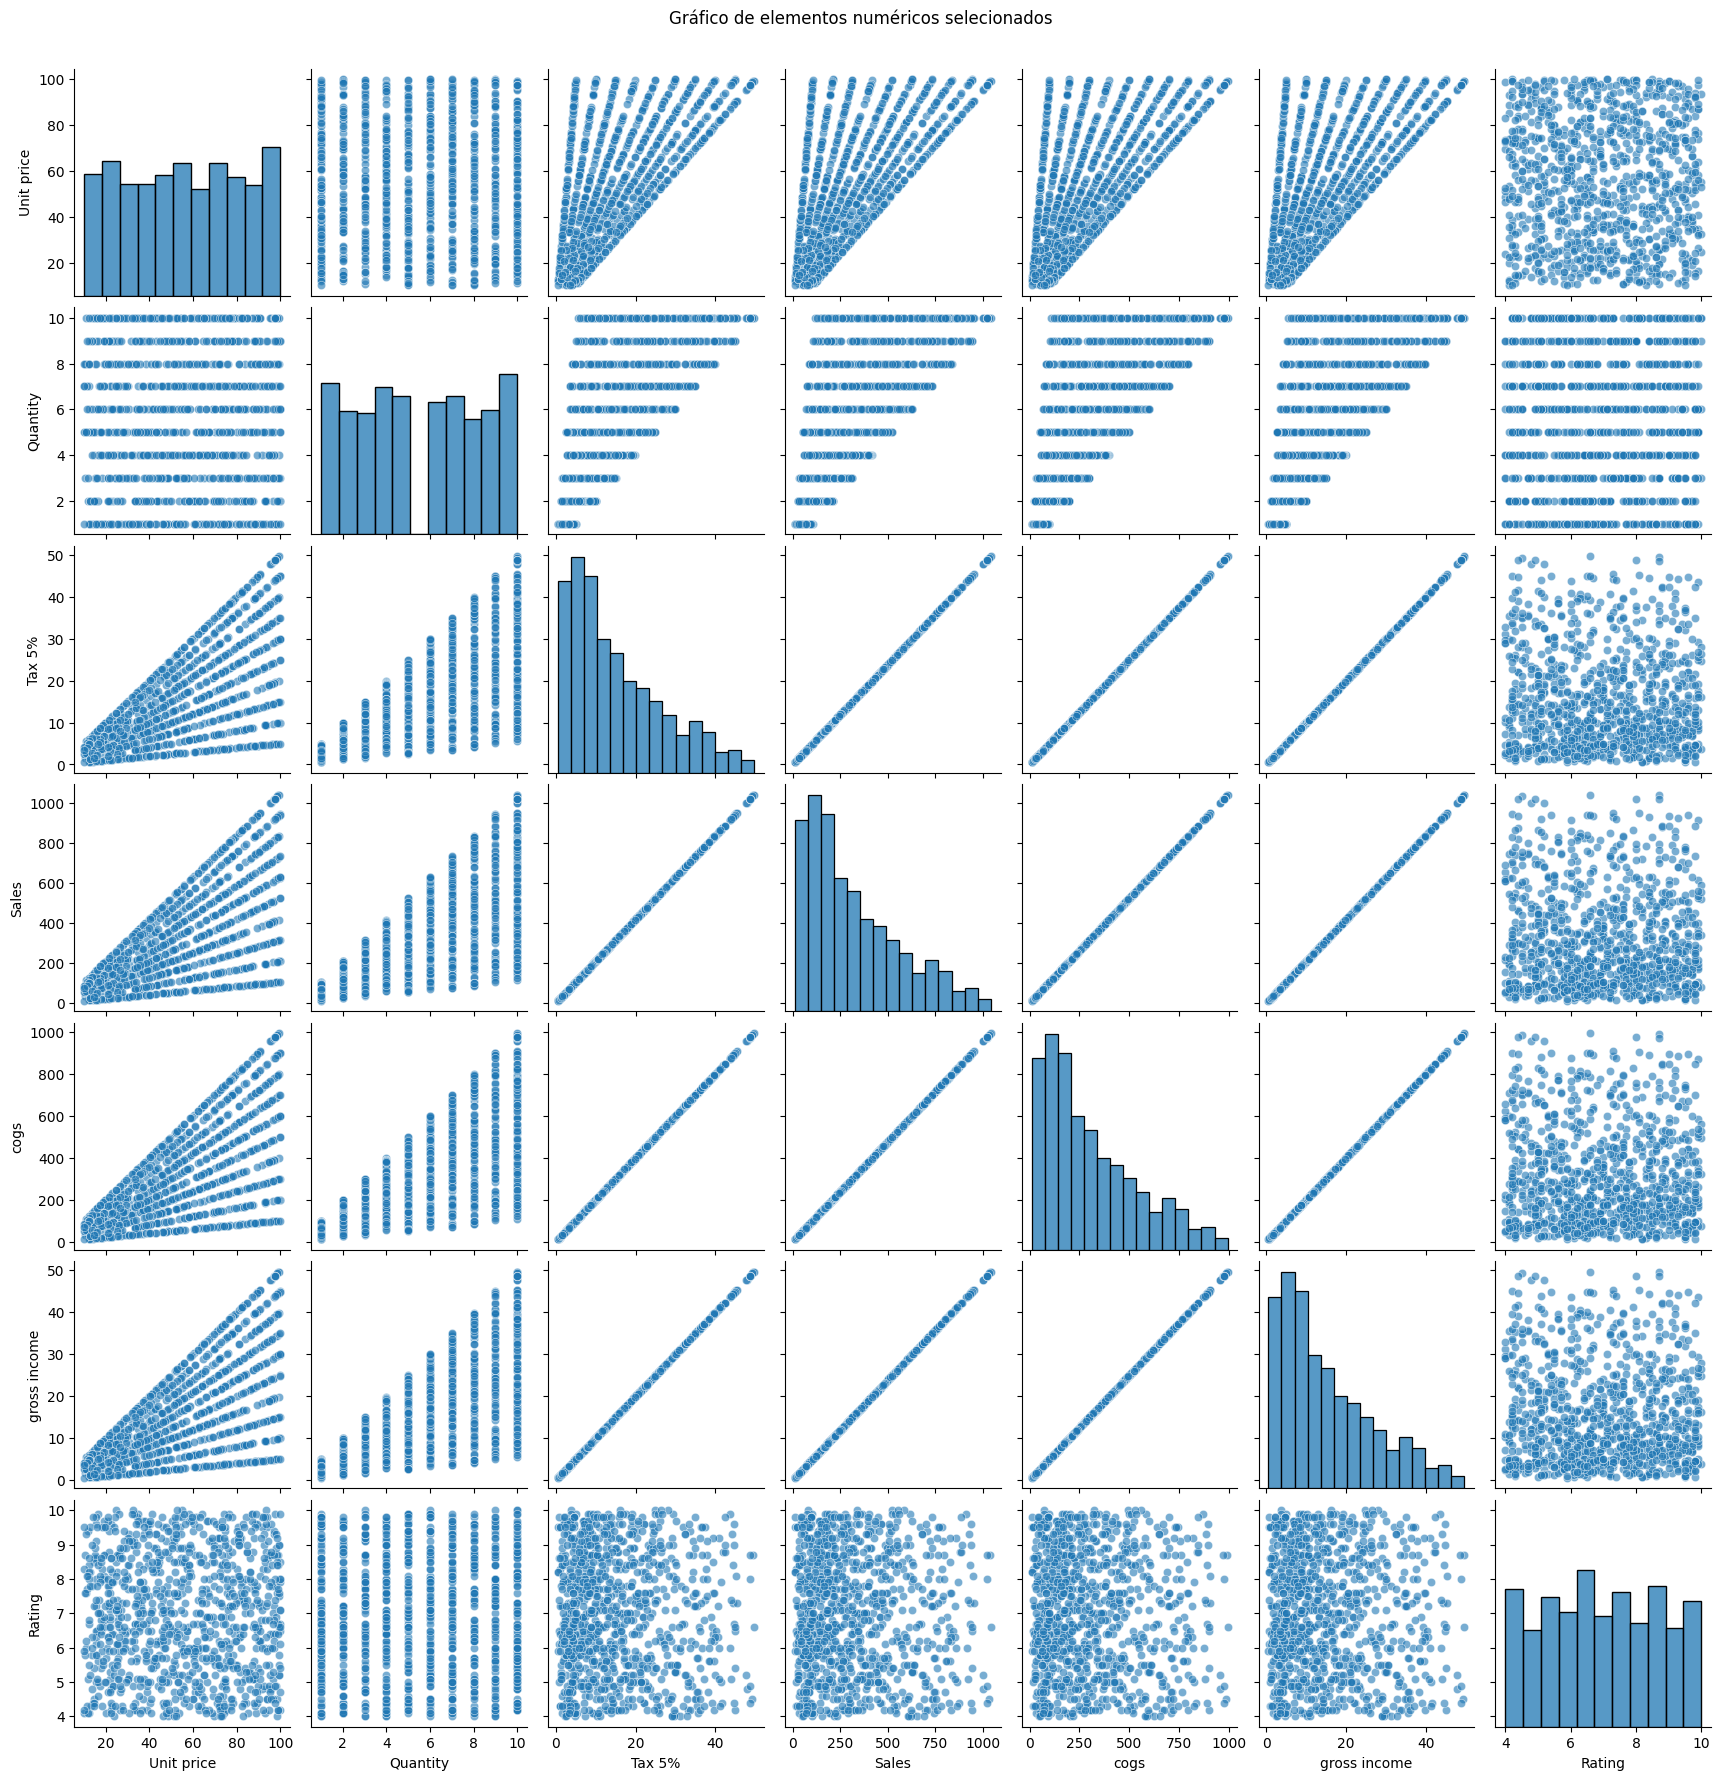

In [233]:
# Gráfico de pares para visualizar as relações entre características numéricas selecionadas.
selected_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']
sns.pairplot(df_copy[selected_cols], kind='scatter', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Gráfico de elementos numéricos selecionados', y=1.02)
plt.show()

#Modificando a Base de Dados

In [234]:
# Nova coluna unificada de data e hora
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Excluindo as colunas de data e tempo separadas
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Novas colunas auxiliares para simplificar as análises
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day

/tmp/ipython-input-851342514.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Payment                  1000 non-null   object        
 11  cogs                     1000 non-null   float64       
 12  gross margin percentage  1000 non-n

In [236]:
# renomeando todas as colunas com letras minúsculas e adicionando "_" no lugar dos espaços
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [237]:
df.head(4)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,payment,cogs,gross_margin_percentage,gross_income,rating,datetime,year,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,1,5
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,3,8
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,3,3
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,1,27


In [238]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum()

,0
invoice_id,0
branch,0
city,0
customer_type,0
gender,0
product_line,0
unit_price,0
quantity,0
tax_5%,0
sales,0


## Banco de Dados

In [239]:
# Criando um banco de dados em memória
db = duckdb.connect(database=':memory:')

In [240]:
#Criando uma tabela dcalendario para usar em casos de uso com união de tabelas com INNER JOIN
min_date = pd.to_datetime(df['datetime'].min())
max_date = pd.to_datetime(df['datetime'].max())

# Format the dates as strings
min_date_str = min_date.strftime('%Y-%m-%d')
max_date_str = max_date.strftime('%Y-%m-%d')


In [241]:
import dcalendario
df_dcalendario = dcalendario.generate_calendar_df(min_date, max_date)

In [242]:
df_dcalendario.head(4)

,Data,Ano,NomeMes,MesAbre,MesAno,MesNum,AnoMesINT,InicioMes,Trimestre,TrimestreAbreviado,Bimestre,Semestre,Semana,DiaSemana,NomeDia,Passado,AnoAtual,MesAtual
0,2019-01-01 10:39:00,2019,January,Jan,Jan-19,1,201901,2019-01-01,1,1º Trim,1º Bim,1º Sem,1,2,Tuesday,True,2019,January
1,2019-01-02 10:39:00,2019,January,Jan,Jan-19,1,201901,2019-01-01,1,1º Trim,1º Bim,1º Sem,1,3,Wednesday,True,2019,January
2,2019-01-03 10:39:00,2019,January,Jan,Jan-19,1,201901,2019-01-01,1,1º Trim,1º Bim,1º Sem,1,4,Thursday,True,2019,January
3,2019-01-04 10:39:00,2019,January,Jan,Jan-19,1,201901,2019-01-01,1,1º Trim,1º Bim,1º Sem,1,5,Friday,True,2019,January


In [243]:
# criando uma tabela no banco de dados chamada dCalendario
db.register('dcalendario', df_dcalendario)

Criando tabela de vendas

In [244]:
query = '''
CREATE TABLE sales
  ( invoice_id varchar,
    branch varchar,
    city varchar,
    customer_type varchar,
    gender varchar,
    product_line varchar,
    unit_price float,
    quantity int,
    tax_5_percent float,
    total float,
    payment varchar,
    cogs float,
    gross_margin_percentage float,
    gross_income float,
    rating float,
    datetime timestamp,
    year int,
    month int,
    day int )
'''
db.sql(query)

Inserindo os dados do DataFrame na tabela

In [245]:
db.sql("INSERT INTO sales SELECT * FROM df")

Exibindo o conteúdo da tabela

In [246]:
db.table("sales").show()

┌─────────────┬─────────┬───────────┬───────────────┬─────────┬────────────────────────┬────────────┬──────────┬───────────────┬──────────┬─────────────┬────────┬─────────────────────────┬──────────────┬────────┬─────────────────────┬───────┬───────┬───────┐
│ invoice_id  │ branch  │   city    │ customer_type │ gender  │      product_line      │ unit_price │ quantity │ tax_5_percent │  total   │   payment   │  cogs  │ gross_margin_percentage │ gross_income │ rating │      datetime       │ year  │ month │  day  │
│   varchar   │ varchar │  varchar  │    varchar    │ varchar │        varchar         │   float    │  int32   │     float     │  float   │   varchar   │ float  │          float          │    float     │ float  │      timestamp      │ int32 │ int32 │ int32 │
├─────────────┼─────────┼───────────┼───────────────┼─────────┼────────────────────────┼────────────┼──────────┼───────────────┼──────────┼─────────────┼────────┼─────────────────────────┼──────────────┼────────┼───────────

##VIEW

Criando uma view para analisar os dados

In [247]:
query = "CREATE VIEW view AS SELECT * FROM sales"
db.sql(query)

In [248]:
db.view("view").show()

┌─────────────┬─────────┬───────────┬───────────────┬─────────┬────────────────────────┬────────────┬──────────┬───────────────┬──────────┬─────────────┬────────┬─────────────────────────┬──────────────┬────────┬─────────────────────┬───────┬───────┬───────┐
│ invoice_id  │ branch  │   city    │ customer_type │ gender  │      product_line      │ unit_price │ quantity │ tax_5_percent │  total   │   payment   │  cogs  │ gross_margin_percentage │ gross_income │ rating │      datetime       │ year  │ month │  day  │
│   varchar   │ varchar │  varchar  │    varchar    │ varchar │        varchar         │   float    │  int32   │     float     │  float   │   varchar   │ float  │          float          │    float     │ float  │      timestamp      │ int32 │ int32 │ int32 │
├─────────────┼─────────┼───────────┼───────────────┼─────────┼────────────────────────┼────────────┼──────────┼───────────────┼──────────┼─────────────┼────────┼─────────────────────────┼──────────────┼────────┼───────────

## SELECT

In [249]:
query = "SELECT 1+1"
duckdb.query(query)

┌─────────┐
│ (1 + 1) │
│  int32  │
├─────────┤
│       2 │
└─────────┘

Selecionando todos os dados

In [250]:
query = "SELECT * FROM view LIMIT 5"
db.sql(query).df()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,payment,cogs,gross_margin_percentage,gross_income,rating,datetime,year,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690002,7,26.1415,548.971497,Ewallet,522.830017,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,1,5
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.8200,80.220001,Cash,76.400002,4.761905,3.8200,9.6,2019-03-08 10:29:00,2019,3,8
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330002,7,16.2155,340.525513,Credit card,324.309998,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,3,3
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220001,8,23.2880,489.048004,Ewallet,465.760010,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,1,27
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.309998,7,30.2085,634.378479,Ewallet,604.169983,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,2,8


In [251]:
query = "SELECT gender, city, branch FROM view LIMIT 5"
db.sql(query).df()

,gender,city,branch
0,Female,Yangon,Alex
1,Female,Naypyitaw,Giza
2,Female,Yangon,Alex
3,Female,Yangon,Alex
4,Female,Yangon,Alex


Selecionando a coluna de ano, posição, pagamento e criando uma coluna calculada realizando uma operação de multiplicação

In [252]:
query = "SELECT unit_price, unit_price * 1.1 FROM view LIMIT 5"
db.sql(query).df()

,unit_price,(unit_price * 1.1)
0,74.690002,82.159004
1,15.280000,16.808001
2,46.330002,50.963001
3,58.220001,64.042000
4,86.309998,94.941002


## DISTINCT

In [253]:
# Extrai os valores únicos das colunas
query = "SELECT DISTINCT gender FROM view"
db.query(query).df()

,gender
0,Female
1,Male


In [254]:
# Extraindo os valores únicos da coluna position
query = "SELECT DISTINCT customer_type FROM view"
db.query(query).df()

,customer_type
0,Member
1,Normal


In [255]:
# Exibindo os valores distintos da coluna product_line
query = "SELECT DISTINCT product_line FROM view"
db.query(query).df()

,product_line
0,Health and beauty
1,Home and lifestyle
2,Sports and travel
3,Fashion accessories
4,Electronic accessories
5,Food and beverages


In [256]:
# Exibindo os valores distintos da coluna product_line e gender
query = "SELECT DISTINCT product_line, gender FROM view ORDER BY product_line, gender"
db.sql(query).df()

,product_line,gender
0,Electronic accessories,Female
1,Electronic accessories,Male
2,Fashion accessories,Female
3,Fashion accessories,Male
4,Food and beverages,Female
5,Food and beverages,Male
6,Health and beauty,Female
7,Health and beauty,Male
8,Home and lifestyle,Female
9,Home and lifestyle,Male


##ORDER BY

In [257]:
# Ordenando a tabela pela coluna rating
query = "SELECT * FROM view ORDER BY rating DESC LIMIT 5"
db.sql(query).df()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,payment,cogs,gross_margin_percentage,gross_income,rating,datetime,year,month,day
0,285-68-5083,Giza,Naypyitaw,Member,Female,Sports and travel,24.740000,3,3.7110,77.931000,Credit card,74.220001,4.761905,3.7110,10.0,2019-02-15 17:47:00,2019,2,15
1,347-34-2234,Cairo,Mandalay,Member,Female,Sports and travel,55.070000,9,24.7815,520.411499,Ewallet,495.630005,4.761905,24.7815,10.0,2019-02-03 13:40:00,2019,2,3
2,423-57-2993,Cairo,Mandalay,Normal,Male,Sports and travel,93.389999,6,28.0170,588.356995,Ewallet,560.340027,4.761905,28.0170,10.0,2019-03-27 19:18:00,2019,3,27
3,725-56-0833,Alex,Yangon,Normal,Female,Health and beauty,32.320000,10,16.1600,339.359985,Credit card,323.200012,4.761905,16.1600,10.0,2019-02-20 16:49:00,2019,2,20
4,866-70-2814,Cairo,Mandalay,Normal,Female,Electronic accessories,52.790001,10,26.3950,554.294983,Ewallet,527.900024,4.761905,26.3950,10.0,2019-02-25 11:58:00,2019,2,25


In [258]:
# Selecionando as colunas customer_type, branch, total, cogs e classifica por cogs
query = "SELECT customer_type, branch, total, cogs FROM view ORDER BY cogs DESC LIMIT 5"
db.sql(query).df()

,customer_type,branch,total,cogs
0,Member,Giza,1042.650024,993.000000
1,Normal,Alex,1039.290039,989.799988
2,Member,Giza,1034.459961,985.200012
3,Normal,Giza,1023.750000,975.000000
4,Normal,Cairo,1022.489990,973.799988


In [259]:
# Selecionando a coluna customer_type, gender, payment e branch e classifica por gender, customer_type e branch
query = "SELECT customer_type, gender, payment, branch FROM view ORDER BY gender, customer_type, branch LIMIT 10"
db.sql(query).df()

,customer_type,gender,payment,branch
0,Member,Female,Ewallet,Alex
1,Member,Female,Ewallet,Alex
2,Member,Female,Ewallet,Alex
3,Member,Female,Ewallet,Alex
4,Member,Female,Credit card,Alex
5,Member,Female,Ewallet,Alex
6,Member,Female,Ewallet,Alex
7,Member,Female,Cash,Alex
8,Member,Female,Credit card,Alex
9,Member,Female,Credit card,Alex


##COUNT

In [260]:
# Conta todas as linhas
query = "SELECT COUNT(*) FROM view"
db.query(query).df()

,count_star()
0,1000


In [261]:
# Contando os valores distintos da coluna product_line
query = "SELECT COUNT(DISTINCT product_line) AS total_products FROM view"
db.sql(query).df()

,total_products
0,6


##SUM

In [262]:
# Realizando a soma da coluna total
query = "SELECT SUM(total) FROM view"
db.sql(query).df()

,sum(total)
0,322966.749206


In [263]:
# Realizando a soma com a função fsum
query = "SELECT fsum(total) FROM view"
db.sql(query).df()

,fsum(total)
0,322966.749206


In [264]:
# Realizando a soma e contagem da coluna total, cogs e a contagem da coluna invoice_id
query = "SELECT SUM(total) AS SOMA_TOTAL, SUM(cogs) AS SOMA_COGS, COUNT(invoice_id) AS TOTAL_REGISTROS FROM view"
db.sql(query).df()

,SOMA_TOTAL,SOMA_COGS,TOTAL_REGISTROS
0,322966.749206,307587.379763,1000


## AVG

In [265]:
# Realizando a contagem média da coluna rating
query = "SELECT AVG(rating) FROM view"
db.sql(query).df()

,avg(rating)
0,6.9727


In [266]:
# Realizando a contagem, média e soma da coluna rating
query = "SELECT AVG(rating) AS MEDIA_RATING, SUM(rating) AS SOMA_RATING, COUNT(rating) AS TOTAL_REGISTROS FROM view"
db.sql(query).df()

,MEDIA_RATING,SOMA_RATING,TOTAL_REGISTROS
0,6.9727,6972.699995,1000


##MEDIAN

In [267]:
# Realizando a mediana da coluna rating
query = "SELECT MEDIAN(rating) FROM view"
db.sql(query).df()

,median(rating)
0,7.0


In [268]:
# Realizando a contagem, soma, média e mediana da coluna rating
query = "SELECT MEDIAN(rating) AS MEDIANA_RATING, AVG(rating) AS MEDIA_RATING, SUM(rating) AS SOMA_RATING, COUNT(rating) AS TOTAL_REGISTROS FROM view"
db.sql(query).df()

,MEDIANA_RATING,MEDIA_RATING,SOMA_RATING,TOTAL_REGISTROS
0,7.0,6.9727,6972.699995,1000


##Desvio Padrão (stddev_pop)

In [269]:
# Calculando o desvio padrão da coluna rating (stddev_pop(x))
query = "SELECT stddev_pop(rating) AS DESVIO_PADRAO_POPULACIONAL, stddev_samp(rating) AS DESVIO_PADRAO_AMOSTRAL FROM view"
db.sql(query).df()

,DESVIO_PADRAO_POPULACIONAL,DESVIO_PADRAO_AMOSTRAL
0,1.717721,1.71858


##Variancia Populacional (var_pop(x))

In [270]:
# Calculando a variância populacional/amostral da coluna rating
query = "SELECT var_pop(rating) AS VARIANCIA_POPULACIONAL, var_samp(rating) AS VARIANCIA_AMOSTRAL FROM view"
db.sql(query).df()

,VARIANCIA_POPULACIONAL,VARIANCIA_AMOSTRAL
0,2.950565,2.953518


##Regressão e Coeficiente de Correlação

In [271]:
# Calculando o coeficiente de correlação
query = "SELECT corr(cogs, gross_income) FROM view"
db.sql(query).df()

,"corr(cogs, gross_income)"
0,1.0


In [272]:
# Calculando o coeficiente de correlação entre o unity_price e rating
query = "SELECT CORR(unit_price, rating) AS COEF_CORRELACAO, regr_slope(rating, unit_price), regr_r2(rating, unit_price), regr_sxx(rating, unit_price), regr_sxy(rating, unit_price) FROM view"
db.query(query).df()

,COEF_CORRELACAO,"regr_slope(rating, unit_price)","regr_r2(rating, unit_price)","regr_sxx(rating, unit_price)","regr_sxy(rating, unit_price)"
0,-0.008778,-0.000569,0.000077,701263.364783,-399.267827


In [273]:
query = "SELECT skewness(rating) FROM view"
db.sql(query).df()

,skewness(rating)
0,0.00901


##MIN MAX

In [274]:
# Retornando o valor mínimo e máximo da coluna rating
query = "SELECT MIN(rating) AS MIN_RATING, MAX(rating) AS MAX_RATING FROM view"
db.sql(query).df()

,MIN_RATING,MAX_RATING
0,4.0,10.0


In [275]:
# Retornando os 5 primeiros valores de cada função
query = "SELECT MIN(unit_price, 5) AS MIN_PRICE, MAX(unit_price, 5) AS MAX_PRICE FROM view"
db.sql(query).df()

,MIN_PRICE,MAX_PRICE
0,"[10.08, 10.13, 10.16, 10.17, 10.18]","[99.96, 99.96, 99.92, 99.89, 99.83]"


##GROUP BY

Agrupa os dados por cidade, calculando o maior, menor, média e soma dos lucros brutos (gross_income) para cada cidade.

Depois, ordena os resultados em ordem decrescente pelo maior lucro bruto (MAX_GROSS_INCOME).

E por fim, realiza o agrupamento por tipo de filial e gender, por soma e contagem

In [276]:
query = '''
SELECT city, MAX(gross_income) AS MAX_GROSS_INCOME,
             MIN(gross_income) AS MIN_GROSS_INCOME,
             AVG(gross_income) AS AVG_GROSS_INCOME,
             SUM(gross_income) AS SUM_GROSS_INCOME
FROM view
GROUP BY city
ORDER BY MAX_GROSS_INCOME DESC
'''
db.sql(query).df()

,city,MAX_GROSS_INCOME,MIN_GROSS_INCOME,AVG_GROSS_INCOME,SUM_GROSS_INCOME
0,Naypyitaw,49.650002,0.5085,16.052367,5265.176480
1,Yangon,49.490002,0.6045,14.874001,5057.160503
2,Mandalay,48.689999,0.8875,15.232024,5057.032013


In [277]:
query = "SELECT branch, gender, SUM(total) AS TOTAL_VENDAS, COUNT(invoice_id) AS TOTAL_REGISTROS FROM view GROUP BY branch, gender ORDER BY branch, gender DESC"
db.sql(query).df()

,branch,gender,TOTAL_VENDAS,TOTAL_REGISTROS
0,Alex,Male,42922.613997,153
1,Alex,Female,63277.756403,187
2,Cairo,Male,44987.586182,148
3,Cairo,Female,61210.086006,184
4,Giza,Male,40384.711528,128
5,Giza,Female,70183.995090,200


##WHERE

In [278]:
# Filtrando apenas as linhas onde a cidade seja igual a Yangon
query = "SELECT * FROM view WHERE city = 'Yangon' LIMIT 4"
db.sql(query).df()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,payment,cogs,gross_margin_percentage,gross_income,rating,datetime,year,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690002,7,26.1415,548.971497,Ewallet,522.830017,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,1,5
1,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330002,7,16.2155,340.525513,Credit card,324.309998,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,3,3
2,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220001,8,23.2880,489.048004,Ewallet,465.760010,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,1,27
3,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.309998,7,30.2085,634.378479,Ewallet,604.169983,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,2,8


In [279]:
# Realizando um filtro com mias de uma condição
query = "SELECT * FROM view WHERE city = 'Yangon' AND gender = 'Female' LIMIT 4"
db.sql(query).df()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,payment,cogs,gross_margin_percentage,gross_income,rating,datetime,year,month,day
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690002,7,26.1415,548.971497,Ewallet,522.830017,4.761905,26.1415,9.1,2019-01-05 13:08:00,2019,1,5
1,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330002,7,16.2155,340.525513,Credit card,324.309998,4.761905,16.2155,7.4,2019-03-03 13:23:00,2019,3,3
2,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220001,8,23.2880,489.048004,Ewallet,465.760010,4.761905,23.2880,8.4,2019-01-27 20:33:00,2019,1,27
3,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.309998,7,30.2085,634.378479,Ewallet,604.169983,4.761905,30.2085,5.3,2019-02-08 10:37:00,2019,2,8


In [280]:
# Realizando filtros com agrupamentos
query = "SELECT branch, city, SUM(gross_income) FROM view WHERE (city = 'Yangon' OR city = 'Naypyitaw') AND gender = 'Female' GROUP BY branch, city LIMIT 4"
db.sql(query).df()

,branch,city,sum(gross_income)
0,Giza,Naypyitaw,3342.094987
1,Alex,Yangon,3013.226501


##Análise descritiva

###Resumo Geral dos Dados

Total de vendas

Receita total

Quantidade total de SKUs vendidos

Quantidade total de unidas vendidas

Lucro bruto total

Quantiade de filiais

Quantiade de cidades atendidas

In [281]:
query = '''
SELECT COUNT(DISTINCT invoice_id) AS TOTAL_VENDAS,
       SUM(total) AS RECEITA_TOTAL,
       COUNT(DISTINCT product_line)  AS QUANTIDADE_TOTAL_SKU,
       SUM(quantity) AS QUANTIDADE_TOTAL_UNIDADES,
       SUM(gross_income) AS LUCRO_BRUTO_TOTAL,
       COUNT(DISTINCT branch) AS QUANTIDADE_FILIAIS,
       COUNT(DISTINCT city) AS QUANTIDADE_CIDADES
FROM view
'''
db.sql(query).df()

,TOTAL_VENDAS,RECEITA_TOTAL,QUANTIDADE_TOTAL_SKU,QUANTIDADE_TOTAL_UNIDADES,LUCRO_BRUTO_TOTAL,QUANTIDADE_FILIAIS,QUANTIDADE_CIDADES
0,1000,322966.749206,6,5510.0,15379.368997,3,3


###Vendas por Filial e Cidade

Receita total e quantidade de vendas por cidade

Total de vendas

Média de avaliação

Mediana das avaliações

In [282]:
query = '''
SELECT
  branch,
  city,
  SUM(total) AS RECEITA_TOTAL,
  COUNT(invoice_id) AS TOTAL_VENDAS,
  ROUND(AVG(rating),2) AS MEDIA_RATING,
  MEDIAN(rating) AS MEDIANA_RATING
FROM view
GROUP BY branch, city
ORDER BY TOTAL_VENDAS DESC, city
'''
db.sql(query).df()

,branch,city,RECEITA_TOTAL,TOTAL_VENDAS,MEDIA_RATING,MEDIANA_RATING
0,Alex,Yangon,106200.370399,340,7.03,7.1
1,Cairo,Mandalay,106197.672188,332,6.82,6.7
2,Giza,Naypyitaw,110568.706618,328,7.07,7.1


###Desenpenho por Categoria de Produto

Receita, quantidade vendida e margem bruta por linha de produto

In [283]:
query = '''
SELECT
  product_line,
  SUM(total) AS RECEITA_TOTAL,
  SUM(quantity) AS QUANTIDADE_VENDIDA,
  SUM(gross_margin_percentage) AS MARGEM_BRUTA_TOTAL
FROM view
GROUP BY product_line
'''

db.sql(query).df()

,product_line,RECEITA_TOTAL,QUANTIDADE_VENDIDA,MARGEM_BRUTA_TOTAL
0,Health and beauty,49193.738920,854.0,723.809517
1,Home and lifestyle,53861.913131,911.0,761.904755
2,Sports and travel,55122.826581,920.0,790.476183
3,Fashion accessories,54305.895185,902.0,847.619040
4,Electronic accessories,54337.531458,971.0,809.523802
5,Food and beverages,56144.843931,952.0,828.571421


###Comportamento de tipos de pagamentos

Proporção de métodos de pagamento utilizados

In [284]:
query = '''
SELECT
  payment,
  COUNT(invoice_id) AS TOTAL_VENDAS,
  ROUND(AVG(rating),2) AS MEDIA_RATING,
  MEDIAN(rating) AS MEDIANA_RATING
FROM view
GROUP BY payment
ORDER BY TOTAL_VENDAS DESC
'''

db.sql(query).df()

,payment,TOTAL_VENDAS,MEDIA_RATING,MEDIANA_RATING
0,Ewallet,345,6.95,6.9
1,Cash,344,6.97,6.9
2,Credit card,311,7.00,7.0


In [285]:
query = '''
SELECT
  payment,
  COUNT(invoice_id) AS total_transactions,
  ROUND((COUNT(invoice_id) * 100.0) / (SELECT COUNT(*) FROM view), 2) AS percentage_of_total
FROM view
GROUP BY payment
ORDER BY percentage_of_total DESC
'''

db.sql(query).df()

,payment,total_transactions,percentage_of_total
0,Ewallet,345,34.5
1,Cash,344,34.4
2,Credit card,311,31.1


###Vendas por perfil de clientes

Receita e quantidade de vendas por tipo de cliente e gênero

In [286]:
query = '''
SELECT
  customer_type,
  gender,
  SUM(total) AS RECEITA_TOTAL,
  COUNT(invoice_id) AS TOTAL_VENDAS,
  ROUND(AVG(rating),2) AS MEDIA_RATING,
  MEDIAN(rating) AS MEDIANA
FROM view
GROUP BY customer_type, gender
ORDER BY TOTAL_VENDAS DESC
'''

db.sql(query).df()

,customer_type,gender,RECEITA_TOTAL,TOTAL_VENDAS,MEDIA_RATING,MEDIANA
0,Member,Female,125206.136913,356,6.89,6.95
1,Normal,Male,63806.284534,220,7.01,6.90
2,Normal,Female,69465.700586,215,7.08,7.20
3,Member,Male,64488.627172,209,6.97,6.90


###Desenpenho por cidade

Receita e quantidade de vendas por cidade

In [287]:
query = '''
SELECT
  city,
  ROUND(SUM(total),1) AS RECEITA_TOTAL,
  COUNT(invoice_id) AS TOTAL_VENDAS,
  ROUND(AVG(rating),2) AS MEDIA_RATING,
  MEDIAN(rating) AS MED
FROM view
GROUP BY city
ORDER BY RECEITA_TOTAL DESC
'''

db.sql(query).df()

,city,RECEITA_TOTAL,TOTAL_VENDAS,MEDIA_RATING,MED
0,Naypyitaw,110568.7,328,7.07,7.1
1,Yangon,106200.4,340,7.03,7.1
2,Mandalay,106197.7,332,6.82,6.7


##Análise Preditiva

Utilizando modelos para prever:

Receita por categoria de Produto e Mês

Identificar tendências mensais nas vendas por linha de produto.

In [288]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'sales', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'datetime',
       'year', 'month', 'day'],
      dtype='object')

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [290]:
query = '''
SELECT
  product_line,
  month,
  SUM(total) AS RECEITA_TOTAL
FROM view
GROUP BY product_line, month
ORDER BY month
'''

df = db.execute(query).fetchdf()

# Codificação da linha de produtos
df_encoded = pd.get_dummies(df, columns=['product_line'], drop_first=True)

# Modelagem
X = df_encoded.drop('RECEITA_TOTAL', axis=1)
y = df_encoded['RECEITA_TOTAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação e previsão
y_pred = model.predict(X_test)

print(y_pred)

# Criar um DataFrame com previsões e valores reais
resultados = pd.DataFrame({
    'Previsões': y_pred,
    'Valores Reais': y_test
})

[16532.47988825 16855.09771328 20713.76482487 18414.35285788]


In [292]:
resultados.head()

,Previsões,Valores Reais
0,16532.479888,16383.170965
1,16855.097713,21667.022976
8,20713.764825,12434.383481
5,18414.352858,19570.530037


In [293]:
query = '''
SELECT
  product_line,
  month,
  SUM(total) AS RECEITA_TOTAL
FROM view
GROUP BY product_line, month
ORDER BY month
'''
db.sql(query).df()

,product_line,month,RECEITA_TOTAL
0,Food and beverages,1,19570.530037
1,Health and beauty,1,16383.170965
2,Sports and travel,1,21667.022976
3,Electronic accessories,1,18831.288071
4,Home and lifestyle,1,20494.740007
5,Fashion accessories,1,19345.115985
6,Sports and travel,2,13809.610518
7,Electronic accessories,2,17362.904945
8,Home and lifestyle,2,12434.383481
9,Fashion accessories,2,19009.861666


##Análise Prescritiva

Identificar categorias de produtos com maior retorno por unidade vendida para priorizar a reposição

In [294]:
query = '''
SELECT
  product_line,
  AVG(unit_price) AS PRECO_MEDIO,
  SUM(total) AS RECEITA_TOTAL,
  SUM(gross_income) / SUM(quantity) AS income_per_unit
FROM view
GROUP BY product_line
ORDER BY income_per_unit DESC
'''

db.sql(query).df().head(5)

,product_line,PRECO_MEDIO,RECEITA_TOTAL,income_per_unit
0,Fashion accessories,57.153652,54305.895185,2.866957
1,Sports and travel,56.993253,55122.826581,2.853148
2,Home and lifestyle,55.316937,53861.913131,2.815426
3,Food and beverages,56.008851,56144.843931,2.808366
4,Health and beauty,54.854474,49193.738920,2.743043


Recomendações para Aumentar as Vendas

Identificar cidades com baixo desempenho e criar estratégias de marketing

In [295]:
query = '''
SELECT
  city,
  SUM(total) AS RECEITA_TOTAL,
  COUNT(invoice_id) AS TOTAL_VENDAS,
  ROUND(AVG(rating),2) AS MEDIA_RATING,
  MEDIAN(rating) AS MEDIANA
FROM view
GROUP BY city
ORDER BY RECEITA_TOTAL ASC
'''

db.sql(query).df()

,city,RECEITA_TOTAL,TOTAL_VENDAS,MEDIA_RATING,MEDIANA
0,Mandalay,106197.672188,332,6.82,6.7
1,Yangon,106200.370399,340,7.03,7.1
2,Naypyitaw,110568.706618,328,7.07,7.1


Vendas de produtos por cidade durante os meses

In [296]:
query = """
SELECT
    city,
    strftime('%Y-%m', datetime) AS sales_month,
    product_line,
    SUM(total) AS total_sales
FROM
    view
GROUP BY
    city,
    sales_month,
    product_line
ORDER BY
    city,
    sales_month,
    product_line;
"""
db.sql(query).df()

,city,sales_month,product_line,total_sales
0,Mandalay,2019-01,Electronic accessories,6699.777046
1,Mandalay,2019-01,Fashion accessories,6112.595985
2,Mandalay,2019-01,Food and beverages,6609.277504
3,Mandalay,2019-01,Health and beauty,6399.886473
4,Mandalay,2019-01,Home and lifestyle,4586.442001
5,Mandalay,2019-01,Sports and travel,6768.079494
6,Mandalay,2019-02,Electronic accessories,6686.252956
7,Mandalay,2019-02,Fashion accessories,6137.113567
8,Mandalay,2019-02,Food and beverages,5554.814980
9,Mandalay,2019-02,Health and beauty,5856.427526


Verificando a quantidade de produtos vendidos por cida

Para gerar uma ação de venda e alavancar as vendas dos produtos que menos vendem por cida, como obter as cidades cujo projeto teve menor quantiade vendida?

In [297]:
query = """
SELECT
    product_line,
    SUM(quantity) AS total_quantity_sold,
FROM
    view
GROUP BY
    product_line
ORDER BY
    total_quantity_sold DESC;
"""
res = db.sql(query).df()
print(res)

             product_line  total_quantity_sold
0  Electronic accessories                971.0
1      Food and beverages                952.0
2       Sports and travel                920.0
3      Home and lifestyle                911.0
4     Fashion accessories                902.0
5       Health and beauty                854.0


/tmp/ipython-input-59278274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_line', y='total_quantity_sold', data=res, palette="viridis")


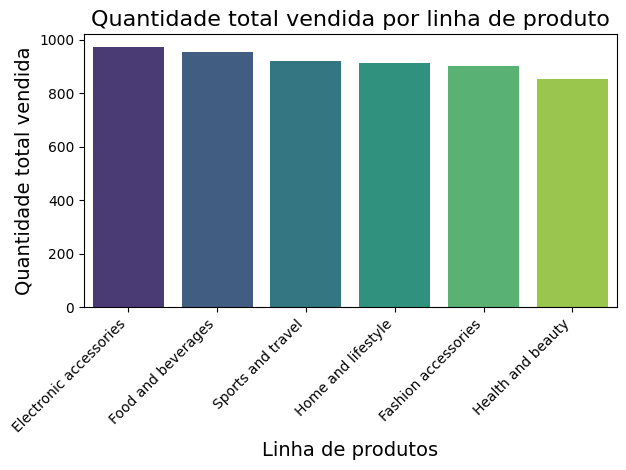

In [298]:
sns.barplot(x='product_line', y='total_quantity_sold', data=res, palette="viridis")
plt.title('Quantidade total vendida por linha de produto', fontsize=16)
plt.xlabel('Linha de produtos', fontsize=14)
plt.ylabel('Quantidade total vendida', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [299]:
query = """
SELECT
    product_line,
    SUM(quantity) AS total_quantity_sold,
    city
FROM
    view
GROUP BY
    city,
    product_line
ORDER BY
    product_line, total_quantity_sold ASC;
"""
db.sql(query).df()

,product_line,total_quantity_sold,city
0,Electronic accessories,316.0,Mandalay
1,Electronic accessories,322.0,Yangon
2,Electronic accessories,333.0,Naypyitaw
3,Fashion accessories,263.0,Yangon
4,Fashion accessories,297.0,Mandalay
5,Fashion accessories,342.0,Naypyitaw
6,Food and beverages,270.0,Mandalay
7,Food and beverages,313.0,Yangon
8,Food and beverages,369.0,Naypyitaw
9,Health and beauty,257.0,Yangon


In [300]:
query = '''
WITH MinProductCity AS (
    SELECT
        product_line,
        SUM(quantity) AS total_quantity,
        city,
        ROW_NUMBER() OVER (PARTITION BY product_line ORDER BY SUM(quantity) ASC) AS rn
    FROM
        view
    GROUP BY
        product_line, city
)
SELECT
    product_line,
    total_quantity,
    city
FROM
    MinProductCity
WHERE
    rn = 1;
'''

db.sql(query).df()

,product_line,total_quantity,city
0,Food and beverages,270.0,Mandalay
1,Home and lifestyle,245.0,Naypyitaw
2,Health and beauty,257.0,Yangon
3,Sports and travel,265.0,Naypyitaw
4,Fashion accessories,263.0,Yangon
5,Electronic accessories,316.0,Mandalay


Visualizando a utilização da funcionalidade: ROW_NUMBER()

In [301]:
query = '''
WITH MinProductCity AS (
    SELECT
        product_line,
        SUM(quantity) AS total_quantity,
        city,
        ROW_NUMBER() OVER (PARTITION BY product_line ORDER BY SUM(quantity) ASC) AS rn
    FROM
        view
    GROUP BY
        product_line, city
)
SELECT
    *
FROM
    MinProductCity
'''
db.sql(query).df()

,product_line,total_quantity,city,rn
0,Health and beauty,257.0,Yangon,1
1,Health and beauty,277.0,Naypyitaw,2
2,Health and beauty,320.0,Mandalay,3
3,Sports and travel,265.0,Naypyitaw,1
4,Sports and travel,322.0,Mandalay,2
5,Sports and travel,333.0,Yangon,3
6,Fashion accessories,263.0,Yangon,1
7,Fashion accessories,297.0,Mandalay,2
8,Fashion accessories,342.0,Naypyitaw,3
9,Food and beverages,270.0,Mandalay,1


In [302]:
query = '''
WITH monthly_sales AS (
    SELECT
        branch,
        DATE_TRUNC('month', datetime) AS month,
        SUM(total) AS monthly_revenue
    FROM view
    GROUP BY branch, DATE_TRUNC('month', datetime)
)
SELECT
    branch,
    month,
    monthly_revenue,
    LAG(monthly_revenue) OVER (PARTITION BY branch ORDER BY month) AS prev_month_revenue,
    monthly_revenue - LAG(monthly_revenue) OVER (PARTITION BY branch ORDER BY month) AS revenue_change
FROM monthly_sales
ORDER BY branch, month;
'''

db.sql(query).df()

,branch,month,monthly_revenue,prev_month_revenue,revenue_change
0,Alex,2019-01-01,38681.128439,NaN,NaN
1,Alex,2019-02-01,29860.120491,38681.128439,-8821.007948
2,Alex,2019-03-01,37659.121469,29860.120491,7799.000978
3,Cairo,2019-01-01,37176.058504,NaN,NaN
4,Cairo,2019-02-01,34424.271013,37176.058504,-2751.787491
5,Cairo,2019-03-01,34597.342670,34424.271013,173.071657
6,Giza,2019-01-01,40434.681098,NaN,NaN
7,Giza,2019-02-01,32934.982424,40434.681098,-7499.698674
8,Giza,2019-03-01,37199.043097,32934.982424,4264.060673


In [303]:
db.table("view").show()

┌─────────────┬─────────┬───────────┬───────────────┬─────────┬────────────────────────┬────────────┬──────────┬───────────────┬──────────┬─────────────┬────────┬─────────────────────────┬──────────────┬────────┬─────────────────────┬───────┬───────┬───────┐
│ invoice_id  │ branch  │   city    │ customer_type │ gender  │      product_line      │ unit_price │ quantity │ tax_5_percent │  total   │   payment   │  cogs  │ gross_margin_percentage │ gross_income │ rating │      datetime       │ year  │ month │  day  │
│   varchar   │ varchar │  varchar  │    varchar    │ varchar │        varchar         │   float    │  int32   │     float     │  float   │   varchar   │ float  │          float          │    float     │ float  │      timestamp      │ int32 │ int32 │ int32 │
├─────────────┼─────────┼───────────┼───────────────┼─────────┼────────────────────────┼────────────┼──────────┼───────────────┼──────────┼─────────────┼────────┼─────────────────────────┼──────────────┼────────┼───────────

A gerência tem o hábito de solicitar rankings para praticamente tudo: produtos mais vendidos, salários, colaboradores por departamento e receita por qualquer segmento possível. Por isso, é necessário calcular o faturamento de cada produto e organizá-lo em forma de classificação. Para isso, o código a seguir resolve essa tarefa utilizando a função RANK().

In [304]:
query = '''
SELECT
  product_line,
  unit_price,
  quantity,
  unit_price * quantity AS total_revenue,
  RANK() OVER (ORDER BY unit_price * quantity DESC) AS revenue_rank
FROM view
'''
db.sql(query).df()

,product_line,unit_price,quantity,total_revenue,revenue_rank
0,Fashion accessories,99.300003,10,993.000000,1
1,Fashion accessories,98.980003,10,989.800049,2
2,Food and beverages,98.519997,10,985.199951,3
3,Home and lifestyle,97.500000,10,975.000000,4
4,Home and lifestyle,97.379997,10,973.799988,5
...,...,...,...,...,...
995,Home and lifestyle,13.980000,1,13.980000,996
996,Fashion accessories,12.780000,1,12.780000,997
997,Fashion accessories,12.540000,1,12.540000,998
998,Fashion accessories,12.090000,1,12.090000,999


##Calculando o delta

O propósito dessa função é mostrar de forma simples e objetiva as variações mensais da receita bruta. Ela ajuda os gestores a identificar rapidamente crescimentos ou reduções no faturamento, tornando a análise de desempenho ao longo do tempo mais eficiente. Com base nessas informações, é possível reconhecer tendências, ajustar estratégias de vendas ou marketing e definir ações corretivas ou de estímulo quando necessário. Em síntese, trata-se de uma ferramenta fundamental para acompanhar a saúde financeira do negócio e apoiar decisões estratégicas.

O princípio para calcular o delta é deduzir o mês anterior do mês atual.

In [305]:
query = '''
SELECT month,
       gross_income,
       LAG(gross_income) OVER (ORDER BY month) AS previous_month_revenue,
       gross_income - LAG(gross_income, 1) OVER (ORDER BY month) AS revenue_delta
FROM view
'''
db.sql(query).df()

,month,gross_income,previous_month_revenue,revenue_delta
0,1,26.141500,NaN,NaN
1,1,23.288000,26.141500,-2.853500
2,1,3.626000,23.288000,-19.662001
3,1,28.115999,3.626000,24.490000
4,1,21.783001,28.115999,-6.332998
...,...,...,...,...
995,3,43.866001,1.272500,42.593502
996,3,41.169998,43.866001,-2.696003
997,3,14.140000,41.169998,-27.029999
998,3,5.803000,14.140000,-8.337000


##Calculando totais acumulados

In [306]:
query = '''
SELECT month,
       payment,
       gross_income,
       SUM(gross_income) OVER (PARTITION BY payment ORDER BY month ASC) AS cumulative_income
FROM view
'''
db.sql(query)

┌───────┬─────────────┬──────────────┬────────────────────┐
│ month │   payment   │ gross_income │ cumulative_income  │
│ int32 │   varchar   │    float     │       double       │
├───────┼─────────────┼──────────────┼────────────────────┤
│     1 │ Cash        │      31.5855 │ 1989.0515033006668 │
│     1 │ Cash        │       27.935 │ 1989.0515033006668 │
│     1 │ Cash        │       15.388 │ 1989.0515033006668 │
│     1 │ Cash        │         8.01 │ 1989.0515033006668 │
│     1 │ Cash        │        4.669 │ 1989.0515033006668 │
│     1 │ Cash        │        22.09 │ 1989.0515033006668 │
│     1 │ Cash        │      33.7295 │ 1989.0515033006668 │
│     1 │ Cash        │      35.1315 │ 1989.0515033006668 │
│     1 │ Cash        │       33.512 │ 1989.0515033006668 │
│     1 │ Cash        │       34.986 │ 1989.0515033006668 │
│     · │  ·          │          ·   │          ·         │
│     · │  ·          │          ·   │          ·         │
│     · │  ·          │          ·   │  

In [307]:
  query = '''
  SELECT month, payment,
         SUM(gross_income) AS total_income
  FROM view
  GROUP BY month, payment
  '''
  db.sql(query).df()

,month,payment,total_income
0,1,Ewallet,1727.390998
1,3,Credit card,1483.831997
2,2,Ewallet,1433.953001
3,3,Ewallet,2076.422996
4,1,Credit card,1821.265508
5,2,Credit card,1493.334506
6,3,Cash,1651.911994
7,1,Cash,1989.051503
8,2,Cash,1702.206493


##Criando relatório com condições

In [308]:
query = '''
SELECT
  datetime,
  gross_income,
  date_diff('day', '2019-01-27 20:33:00', datetime) AS date_diff,
  CASE
    WHEN date_diff('day', '2019-01-27 20:33:00', datetime) < 0 THEN 'Atrasado'
    WHEN date_diff('day', '2019-01-27 20:33:00', datetime) = 0 THEN 'Hoje'
    ELSE 'Em dia'
  END AS status
FROM view
'''
db.sql(query).df()

,datetime,gross_income,date_diff,status
0,2019-01-05 13:08:00,26.141500,-22,Atrasado
1,2019-03-08 10:29:00,3.820000,40,Em dia
2,2019-03-03 13:23:00,16.215500,35,Em dia
3,2019-01-27 20:33:00,23.288000,0,Hoje
4,2019-02-08 10:37:00,30.208500,12,Em dia
...,...,...,...,...
995,2019-01-29 13:46:00,2.017500,2,Em dia
996,2019-03-02 17:16:00,48.689999,34,Em dia
997,2019-02-09 13:22:00,1.592000,13,Em dia
998,2019-02-22 15:33:00,3.291000,26,Em dia
